In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

## Load Perfection

In [2]:
df = pd.read_csv('/home/ruairi/data/tmp/perfection_talk.csv')

/home/ruairi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df[(df['response']!='excluded')]

In [4]:
def normalise2(df):
    return df.groupby('neuron_id')['firing_rate'].apply(lambda x: x.divide(np.mean(x.iloc[:len(x)//2])).multiply(100))

In [5]:
acute = df[df['group_id'].isin([1, 2, 3, 4])].copy()
acute['normalised'] = normalise2(acute)

In [6]:
control = acute[acute['group_id']==2]
t_increase = acute[(acute['group_id']==1) & 
                   (acute['response']=='decrease')]

t_decrease = acute[(acute['group_id']==3)]

control['group'] = 'Naive + Saline'
t_increase['group'] = 'Naive + Citalopram Decrease'
t_decrease['group'] = 'Chronic Citalopram + Citalopram'

tmp = pd.concat([control, t_increase, t_decrease])

/home/ruairi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/ruairi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ruairi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

In [7]:
t_decrease['neuron_id'].unique()

array([237, 238, 239, 242, 243, 246, 248, 249, 253, 278, 279, 281, 282,
       285, 308, 309, 310, 311, 312, 314, 315, 316, 317, 318, 319, 320,
       321, 322, 324, 325, 326, 327, 329, 330, 333, 336, 337, 338])

/home/ruairi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


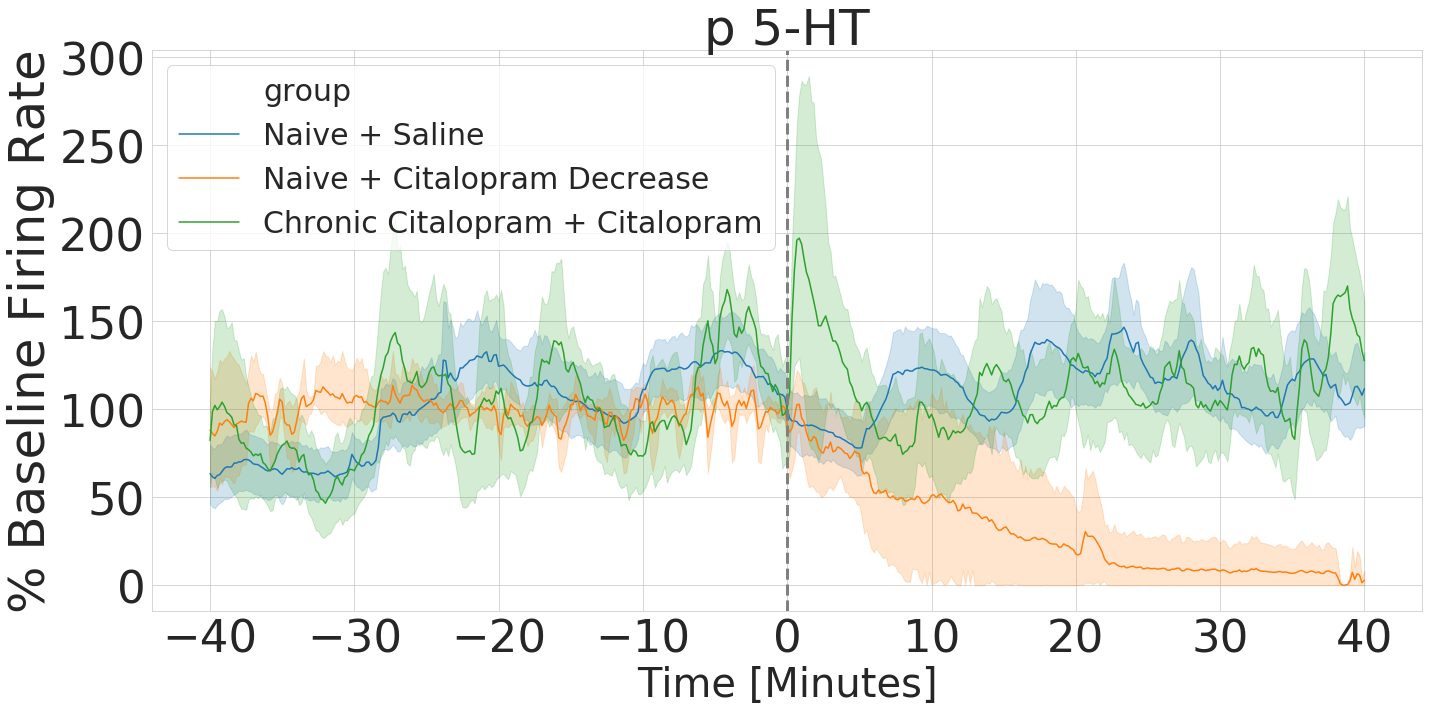

In [8]:
f, a = plt.subplots(figsize=(20, 10))


sns.lineplot(data=tmp[tmp["label"]=='p 5-HT'], 
                     x='time', y='normalised', 
                     hue='group',
                     ax=a)

a.set_ylabel('% Baseline Firing Rate', fontdict={'fontsize':50})
a.set_xlabel('Time [Minutes]', fontdict={'fontsize':40})
a.axvline(0, linewidth=3, linestyle='--', color='grey')
for tick in a.xaxis.get_major_ticks():
    tick.label.set_fontsize(45) 
for tick in a.yaxis.get_major_ticks():
    tick.label.set_fontsize(45)
a.legend(loc=0, prop={'size': 30})
a.set_title('p 5-HT', fontdict={'fontsize': 50})

plt.tight_layout()
#plt.savefig('/home/ruairi/data/figures/talk/line_CHRONICp-5HT.png', dpi=300)

/home/ruairi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


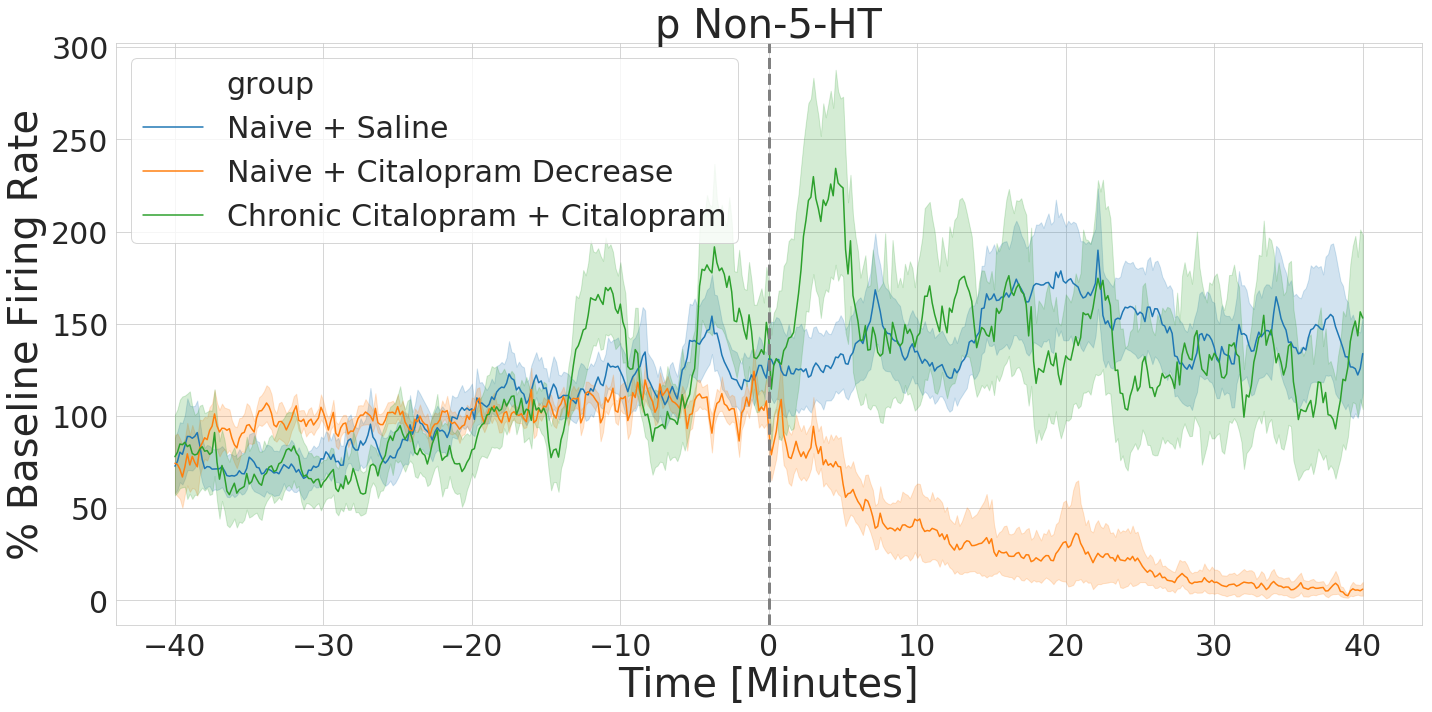

In [9]:
f, a = plt.subplots(figsize=(20, 10))


sns.lineplot(data=tmp[tmp["label"]=='p Non-5-HT'], 
                     x='time', y='normalised', 
                     hue='group',
                     ax=a, ci=80)

a.set_ylabel('% Baseline Firing Rate', fontdict={'fontsize':40})
a.set_xlabel('Time [Minutes]', fontdict={'fontsize':40})
a.axvline(0, linewidth=3, linestyle='--', color='grey')
for tick in a.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in a.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)
a.legend(loc=0, prop={'size': 30})
a.set_title('p Non-5-HT', fontdict={'fontsize': 40})

plt.tight_layout()
#plt.savefig('/home/ruairi/data/figures/talk/line_p-Non-5-HT.png', 
#            dpi=300)

/home/ruairi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


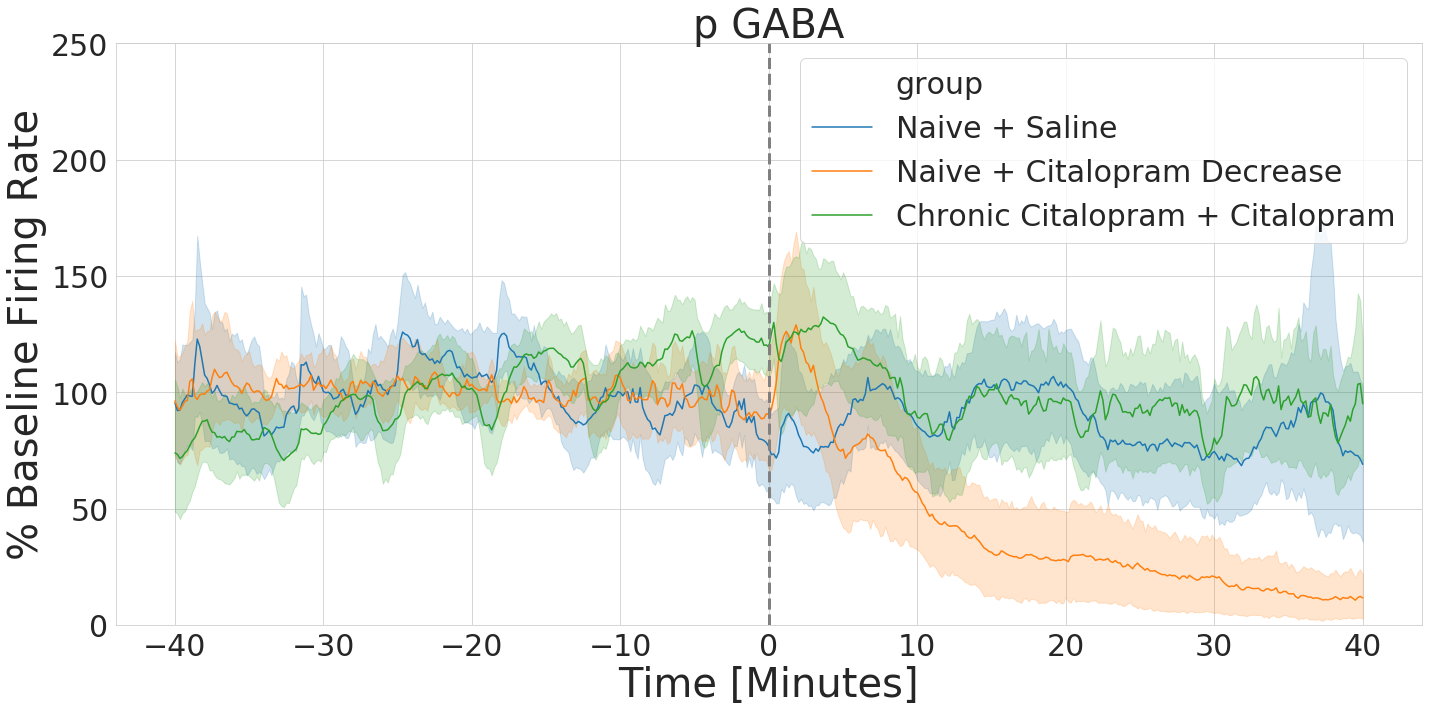

In [10]:
f, a = plt.subplots(figsize=(20, 10))


sns.lineplot(data=tmp[tmp["label"]=='p GABA'], 
                     x='time', y='normalised', 
                     hue='group',
                     ax=a)

a.set_ylabel('% Baseline Firing Rate', fontdict={'fontsize':40})
a.set_xlabel('Time [Minutes]', fontdict={'fontsize':40})
a.axvline(0, linewidth=3, linestyle='--', color='grey')
for tick in a.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in a.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)
a.legend(loc=0, prop={'size': 30})
a.set_title('p GABA', fontdict={'fontsize': 40})
a.set_ylim([0, 250])
plt.tight_layout()
#plt.savefig('/home/ruairi/data/figures/talk/line_p-GABA.png', 
#            dpi=300)

In [ ]:
cit2["hc_cluster"].value_counts()

### SERT

In [ ]:
sert = df[df['experiment_name']=='SERT_DREADD'].copy()
sert['normalised'] = normalise2(sert)


# df1 = sert[sert['virus']=='mCherry']
df2 = sert[(sert['virus']=='mCherry') & (sert['response']=='increase')]
df3 = sert[(sert['virus']=='hM3Dq') & (sert['response']=='increase')]
# df5 = sert[sert['treatment']=='CIT']

# df1['group'] = 'mCherry'
df2['group'] = 'mCherry Increase'
df3['group'] = 'hM3Dq Increase'
# df4['group'] = 'CIT Non Responders'
# df5['group'] = 'CIT All Neurons'

sert2 = pd.concat([df2, df3])

In [ ]:
f, a = plt.subplots(figsize=(20, 10))


sns.lineplot(data=sert2[sert2["hc_cluster"]=='Clocklike Slow Regular'], 
                     x='time', y='normalised', 
                     hue='group',
                     ax=a)

a.set_ylabel('% Baseline Firing Rate', fontdict={'fontsize':20})
a.set_xlabel('Time [Minutes]', fontdict={'fontsize':20})
a.axvline(0, linewidth=3, linestyle='--', color='grey')
for tick in a.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in a.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
a.set_title('Slow Regular', fontdict={'fontsize': 30})
a.legend(loc=0, prop={'size': 30})
plt.savefig('/media/ruairi/UBUNTU/figures/lines/sert_sr.png', dpi=300)

In [ ]:
### GAT

In [ ]:
gat = df[df['experiment_name']=='GAT_DREADD'].copy()
gat['normalised'] = normalise2(gat)


# df1 = sert[sert['virus']=='mCherry']
df2 = gat[(gat['virus']=='mCherry') 
           & (gat['response']=='decrease')]
df3 = gat[(gat['virus']=='hM3Dq') 
           & (gat['response']=='decrease')]
# df5 = sert[sert['treatment']=='CIT']

# df1['group'] = 'mCherry'
df2['group'] = 'mCherry Decrease'
df3['group'] = 'hM3Dq Decrease'
# df4['group'] = 'CIT Non Responders'
# df5['group'] = 'CIT All Neurons'

gat2 = pd.concat([df2, df3])

In [ ]:
f, a = plt.subplots(figsize=(20, 10))


sns.lineplot(data=gat2, 
                     x='time', y='normalised', 
                     hue='group',
                     ax=a)

a.set_ylabel('% Baseline Firing Rate', fontdict={'fontsize':20})
a.set_xlabel('Time [Minutes]', fontdict={'fontsize':20})
a.axvline(0, linewidth=3, linestyle='--', color='grey')
for tick in a.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in a.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
a.legend(loc=0, prop={'size': 30})
a.set_title('Slow Firing Neurons', fontdict={'fontsize': 30})
plt.savefig('/media/ruairi/UBUNTU/figures/lines/gat.png', dpi=300)

In [ ]:
gat2.groupby(['group', 'neuron_id']).apply(len)